In [23]:
# Import the necessary features for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import normalize

### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Dataset = Airbnb listings doc for Austin, TX

Outcome Variable = review_scores_value (int, 1-10)

Categorical Variable 1 = property_type (string)

Continuous Variable 1 = host_listings_count (int)

Continuous Variable 2 = accommodates (int)

Continuous Variable 3 = bathrooms (int)

Continuous Variable 4 = bedrooms (int)

C:\Users\maken\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\maken\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


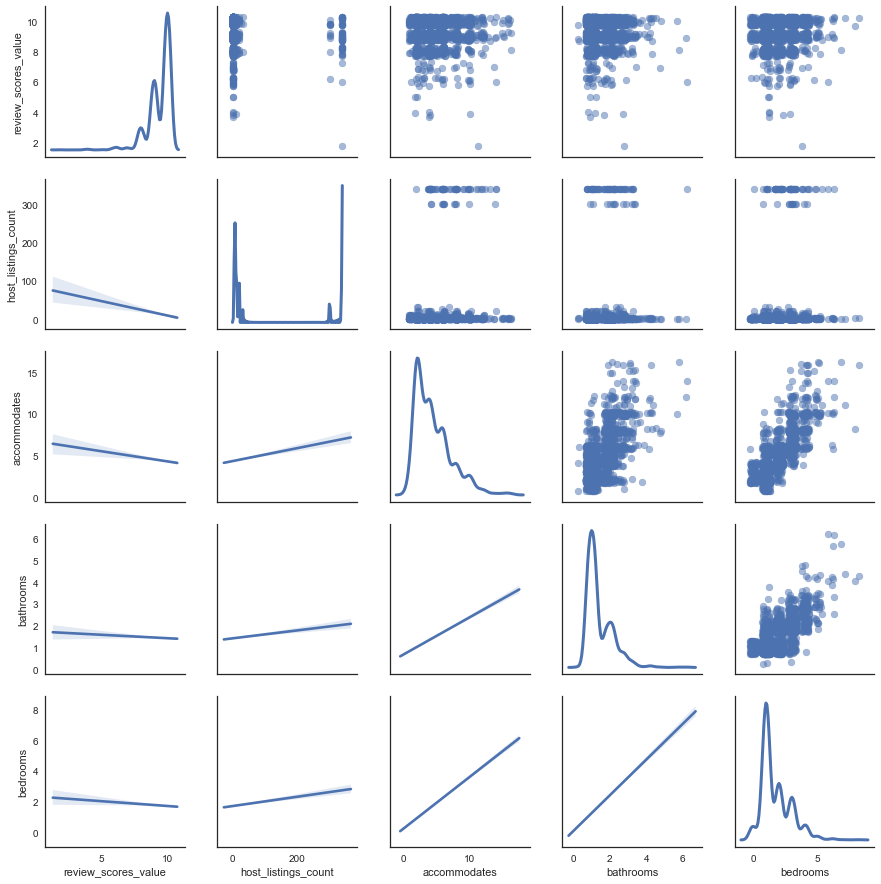

In [63]:
# Bivariate analysis for two continuous variables:
# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

# Take a subset of the data to make plots clearer.
df_use = df.loc[
    ((df['property_type'] == 'House') | (df['property_type'] == 'Apartment')),
    ['property_type', 'review_scores_value', 'host_listings_count', 'accommodates', 
     'bathrooms', 'bedrooms']]


# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_use.loc[:, 'review_scores_value' : 'bedrooms'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size =(df_jittered.shape)),
    columns = df_jittered.columns
                     )
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

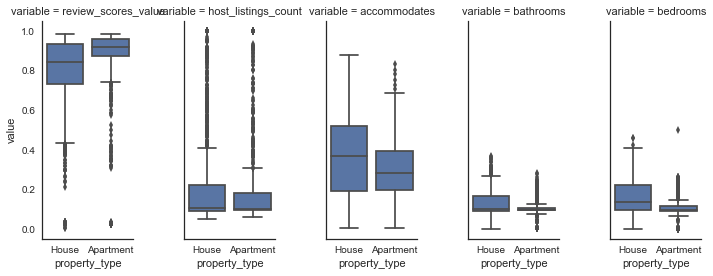

count    3464.000000
mean        0.813061
std         0.207305
min         0.005894
25%         0.771012
50%         0.886796
75%         0.944911
max         0.985329
Name: review_scores_value, dtype: float64
Ttest_indResult(statistic=3.5255669546311177, pvalue=0.00042800602031288639)
count    3464.000000
mean        0.212233
std         0.232398
min         0.048280
25%         0.091670
50%         0.103695
75%         0.197066
max         0.999700
Name: host_listings_count, dtype: float64
Ttest_indResult(statistic=5.5658630358195298, pvalue=2.7346032990139739e-08)
count    3464.000000
mean        0.351857
std         0.177607
min         0.005897
25%         0.193347
50%         0.357771
75%         0.489898
max         0.875481
Name: accommodates, dtype: float64
Ttest_indResult(statistic=21.512669019996274, pvalue=1.4603219596793952e-98)
count    3464.000000
mean        0.118502
std         0.051246
min         0.000000
25%         0.093250
50%         0.098533
75%         0.149906

In [50]:
# Bivariate Analysis for a Continuous and Categorical Pair:

# Plot all variables with boxplots for each property type.
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_box = df_use.dropna()
col = ['review_scores_value', 'host_listings_count', 'accommodates', 
                            'bathrooms', 'bedrooms', 'property_type']
df_box_normalized = df_box[col]
# Remove the property type from the list, since it cannot be normalized
col.pop() # Since property type was the last in the list
df_box_normalized[col] = normalize(df_box[col], norm = 'l2')
# print(df_box_normalized)
df_box_melt = pd.melt(df_box_normalized, id_vars = ['property_type'])
# print(df_box_normalized)


g = sns.FacetGrid(df_box_melt, col='variable', size = 4, aspect = .5)
g = g.map(sns.boxplot, 'property_type', 'value')
plt.show()

# Descriptive statistics by group.
#print(df.groupby('property_type').describe())

# Test whether group differences are signficant.
for col in df_box_normalized.loc[:,'review_scores_value':'property_type'].columns:
    print(df_box_normalized[col].describe())
    if not col == 'property_type':
        print(stats.ttest_ind(
            df_use[df_use['property_type'] == 'House'][col].dropna(),
            df_use[df_use['property_type'] == 'Apartment'][col].dropna()
    ))

### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

In [62]:
# Create a feature for property type = Apartment and property type = House
features = df[['property_type', 'accommodates', 'bathrooms', 'bedrooms', 
               'require_guest_profile_picture', 'require_guest_phone_verification']]

features['IsApartment'] = np.where(df['property_type'] == 'Apartment', 1, 0)
features['accommodates_less_three'] = df['accommodates'] < 3
features['no_bathroom'] = df['bathrooms'] == 0
features['bathrooms_one'] = df['bathrooms'] == 1
features['bathrooms_two_plus'] = df['bathrooms'] >= 2
features['no_bedrooms'] = df['bedrooms'] == 0
features['bedrooms_one'] = np.where(df['bedrooms'] == 1, 1, 0)
features['bedrooms_two_plus'] = np.where(df['bedrooms'] >= 2, 1, 0)
features['require_guest_picture'] = df['require_guest_profile_picture'] == 't'
features['require_guest_phone'] = df['require_guest_phone_verification'] == 't'

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maken\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maken\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\make

### Finally, use filtering methods to select the five best features and justify your choices.